In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

from matplotlib.colors import LinearSegmentedColormap
import matplotlib.image as mpimg

from sklearn.metrics import r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

### Fetching Data

In [2]:
cali = fetch_california_housing()

In [3]:
cali.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
data_df = pd.DataFrame(cali['data'],columns=cali['feature_names']) #data sans target
target_df = pd.DataFrame(cali['target'],columns=['Price']) #target of dataset

df = pd.concat([data_df,target_df],axis=1) #this is the dataframe we will do our EDA on

In [5]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


#### Dataset Description

In [6]:
print(cali['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

### Exploratory Data Analysis

In [7]:
cols = cali['feature_names'][:]
#latitude and longitude need to be trated differently
cols.remove('Latitude')
cols.remove('Longitude')

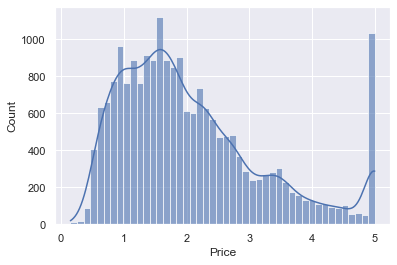

In [8]:
sns.histplot(df['Price'],kde=True,alpha=0.6)
plt.show()

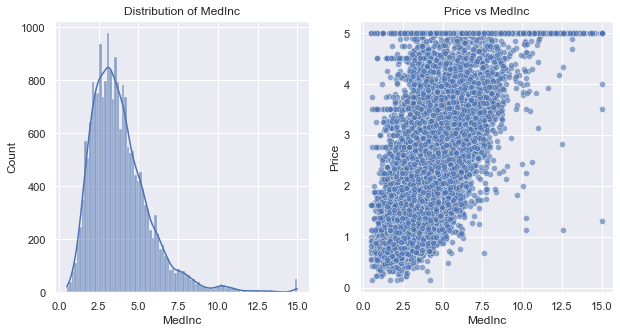

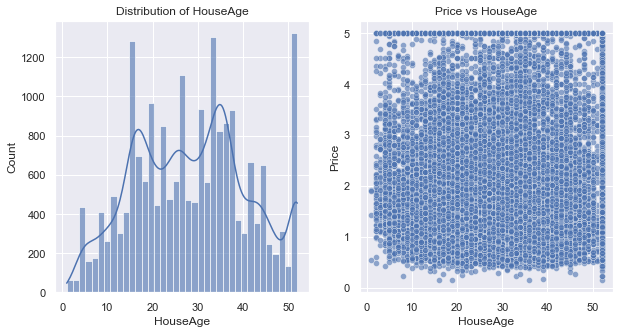

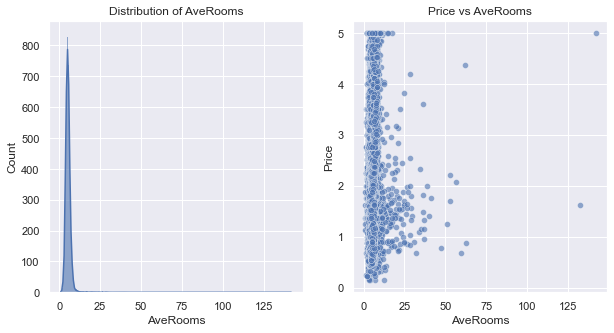

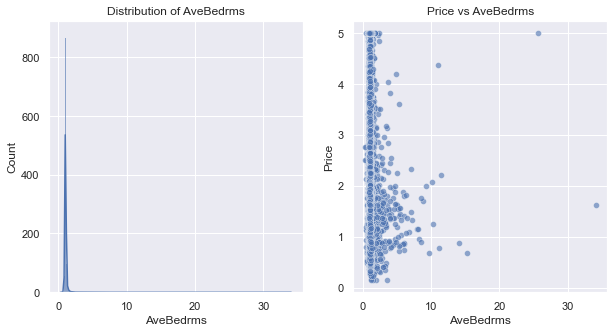

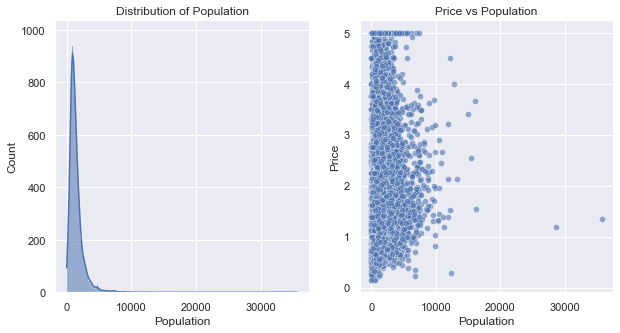

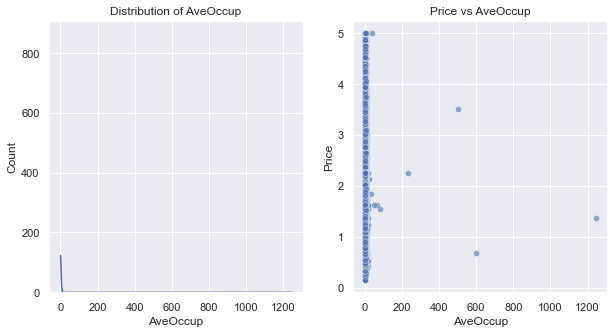

In [9]:
for i in cols:
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
    sns.histplot(data=df,x=i,kde=True,alpha=0.6,ax=ax1)
    ax1.set_xlabel(i)
    ax1.set_title('Distribution of {}'.format(i))
    
    sns.scatterplot(data=df,x=i,y='Price',ax=ax2,alpha=0.6)
    ax2.set_xlabel(i)
    ax2.set_ylabel('Price')
    ax2.set_title('Price vs {}'.format(i))
    plt.show()    

###### Observations: 
MedInc: slightly skewed, looks like a nice linear relationship. <br>
HouseAge: looks like it has no influence on our target. <br>
AveRooms, AveBedrms, Population, AveOccup: very highly skewed. Cannot infer relationship without getting rid of outliers. <br> 

##### Outliers

Note: Total number of instances in dataset: 20640 <br>

In [10]:
def outliers(df,col,thres):
    #finds number of instances with value above thres in col and plots distribution of remaining data
    print('{}: Number of instances with value > {} is {}'.format(col,thres,df.loc[df[col]>thres].shape[0]))
    
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
    sns.histplot(data=df.loc[df[col]<thres],x=col,kde=True,alpha=0.6,ax=ax1)
    ax1.set_xlabel(col)

    sns.scatterplot(data=df.loc[df[col]<thres],x=col,y='Price',ax=ax2,alpha=0.6)
    ax2.set_xlabel(col)
    ax2.set_ylabel('Price')
    ax2.set_title('Price vs {}'.format(col))
    plt.show()    

AveRooms: Number of instances with value > 15 is 109


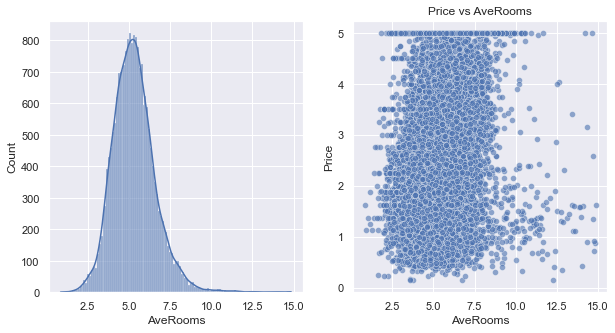

In [11]:
outliers(df,'AveRooms',15) #dropping wherever AveRooms > 15
df.drop(df.loc[df['AveRooms']>15].index,axis=0,inplace=True)

AveBedrms: Number of instances with value > 3 is 11


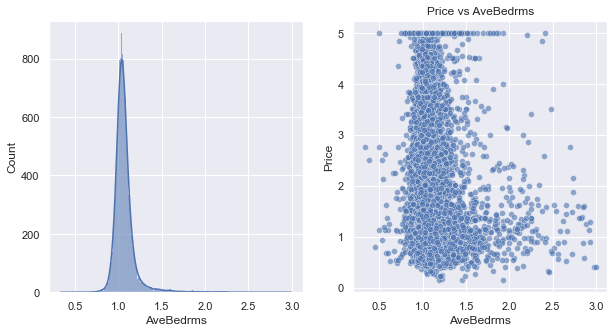

In [12]:
outliers(df,'AveBedrms',3)
df.drop(df.loc[df['AveBedrms']>3].index,axis=0,inplace=True)

Population: Number of instances with value > 10000 is 23


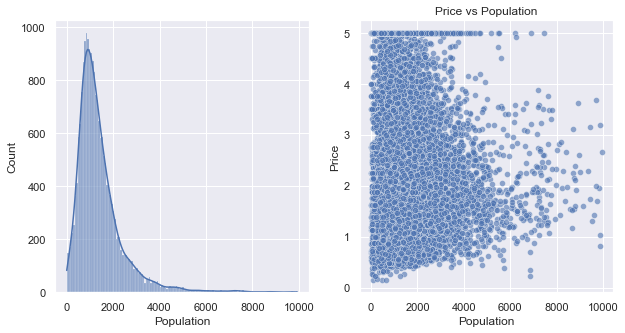

In [13]:
outliers(df,'Population',10000)
df.drop(df.loc[df['Population']>10000].index,axis=0,inplace=True)

AveOccup: Number of instances with value > 25 is 9


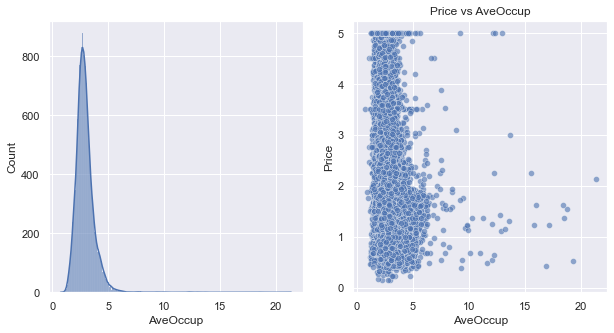

In [14]:
outliers(df,'AveOccup',25)
df.drop(df.loc[df['AveOccup']>15].index,axis=0,inplace=True)

##### Correlations

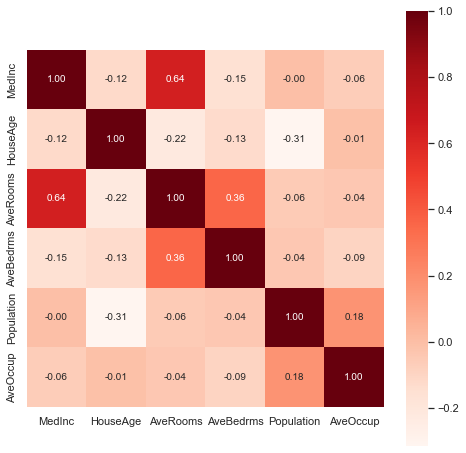

In [15]:
corr = df[cols].corr()
fig,ax=plt.subplots(figsize=(8,8))
sns.heatmap(corr,annot=True,cmap='Reds',square=True,cbar=True,ax=ax,fmt='0.2f')
plt.show()

##### Observations:
1) MedInc and AveRooms have a decent correlation. This can be expected - more the income, bigger the house. Bigger house means more rooms. <br>
2) AveRooms and AveBedrms have a fair correlation - not as much as I would have expected. I did calculate the correlation between them before dropping the outliers, and the correlation came out to be 0.84 - the outliers were having an outsized affect.<br>
A pairplot would show us other insights if any.

In [16]:
#Correlation between AveRooms and AveBedrms before and after dropping outliers
df1 = pd.concat([data_df,target_df],axis=1)
c_before = df1['AveRooms'].corr(df1['AveBedrms'])
c_after = df['AveRooms'].corr(df['AveBedrms'])
print('''Correlation between AveRooms and AveBedrms:\n
Before dropping outliers {:.2f}
After dropping outliers {:.2f}'''.format(c_before,c_after))

Correlation between AveRooms and AveBedrms:

Before dropping outliers 0.85
After dropping outliers 0.36


##### Pairplot

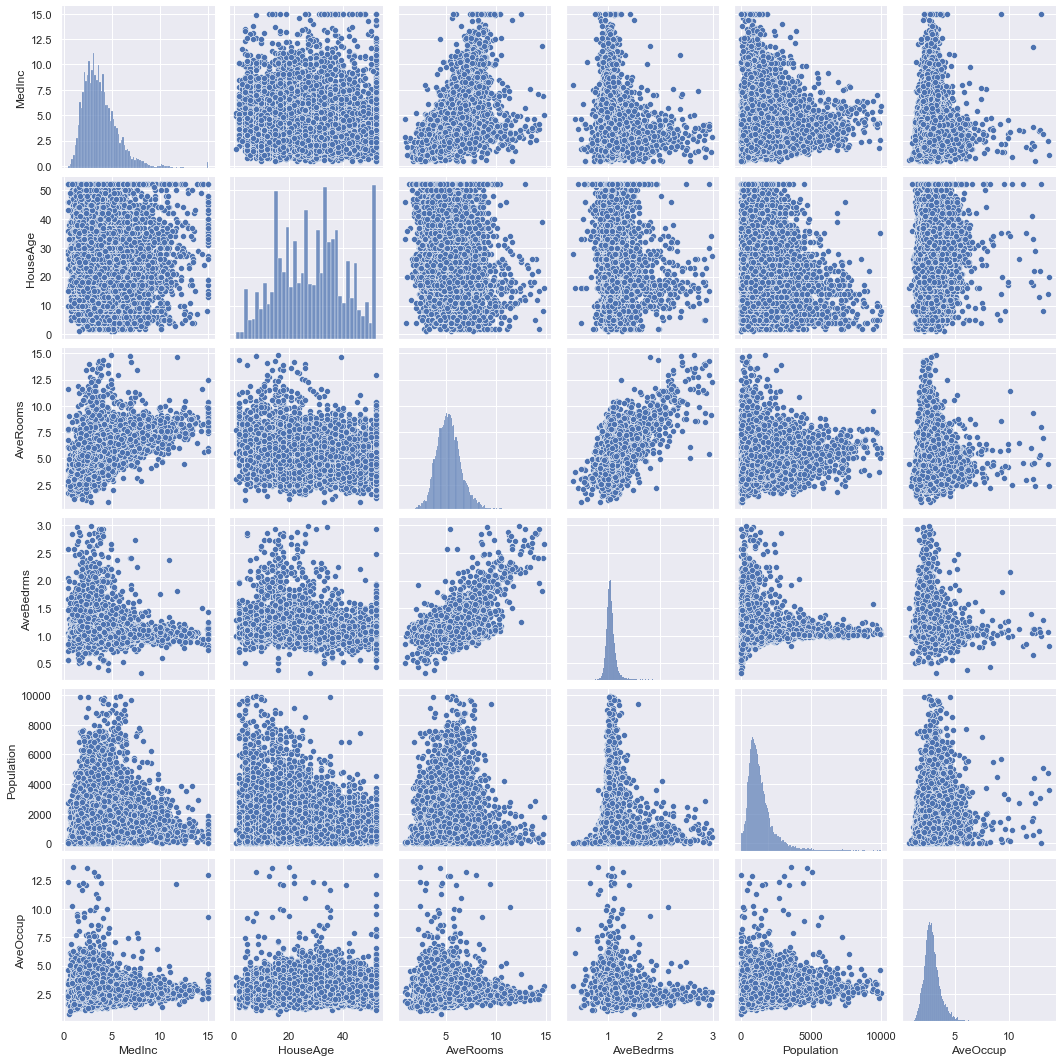

In [17]:
sns.pairplot(df[cols])
plt.show()

This doesn't give any other insights which the correlation heatmap didn't give.

##### Location Data

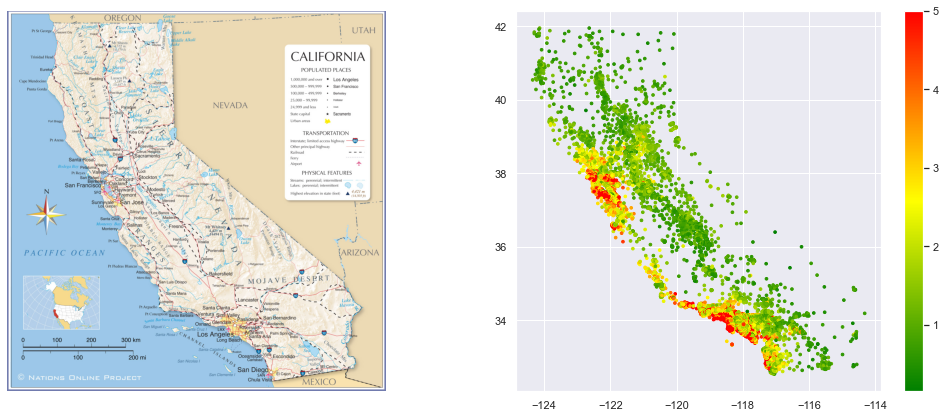

In [18]:
img = mpimg.imread('California_map.jpg')
cmap = LinearSegmentedColormap.from_list(name='name',
                                         colors=['green','yellow','red'])

f,(ax1,ax2) = plt.subplots(1,2,figsize=(18,7))
ax1.imshow(img)
ax1.axis('off')

points = ax2.scatter(df['Longitude'],df['Latitude'],c=df['Price'],
                     s=7,cmap=cmap)
f.colorbar(points)
plt.show()

##### Observations:
The dataset is of california housing prices. The 'map' above shows housing prices are clearly higher near the coast, and houses becoming cheaper, in general, the farther they are from the coast.<br>
Comparing to the map, the pockets of high housing price correspond to Los Angeles and San Francisco, and a small pocket around San Diego.<br>

### Scaling and Splitting Data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Price',axis=1),df['Price'],test_size=0.2,random_state=2)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Model Fitting

In [18]:
regressors = [LinearRegression(),
              DecisionTreeRegressor(),
              RandomForestRegressor(), AdaBoostRegressor(),
              CatBoostRegressor(verbose=False), XGBRegressor(), LGBMRegressor()]

scores = pd.DataFrame(columns=['Regressor','Test-R2','Train-R2','Test-ExplainedVariance','Train-ExplainedVariance'])

for i in regressors:
    i.fit(X_train, y_train)
    y_pred_test = i.predict(X_test)
    y_pred_train = i.predict(X_train)
    r2test = r2_score(y_test,y_pred_test)
    r2train = r2_score(y_train,y_pred_train)
    expvtest = explained_variance_score(y_test,y_pred_test)
    expvtrain = explained_variance_score(y_train,y_pred_train)
    scores.loc[len(scores.index)] = [i.__class__.__name__,r2test,r2train,expvtest,expvtrain]

In [19]:
scores.sort_values(by='Test-R2',inplace=True)
scores

,Regressor,Test-R2,Train-R2,Test-ExplainedVariance,Train-ExplainedVariance
3,AdaBoostRegressor,0.446581,0.439851,0.582487,0.588670
1,DecisionTreeRegressor,0.610594,1.000000,0.610622,1.000000
0,LinearRegression,0.668648,0.651951,0.668898,0.651951
2,RandomForestRegressor,0.811622,0.973260,0.811624,0.973271
5,XGBRegressor,0.843031,0.943886,0.843263,0.943886
6,LGBMRegressor,0.843588,0.885003,0.843669,0.885003
4,CatBoostRegressor,0.855234,0.914440,0.855389,0.914440


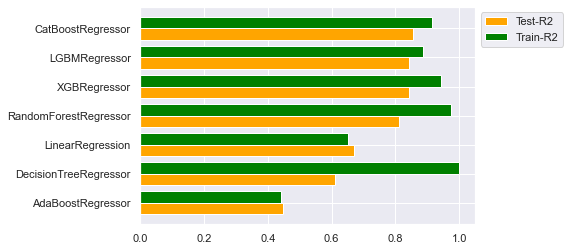

In [20]:
x = np.arange(scores.shape[0])
width=0.4

plt.barh(x-0.2,scores['Test-R2'],width,color='orange')
plt.barh(x+0.2,scores['Train-R2'],width,color='green')
plt.yticks(x,scores['Regressor'])
plt.legend(['Test-R2','Train-R2'],bbox_to_anchor=(1,1))
plt.show()

In [21]:
#catboost feature importance
feat_imp_cat = np.flip(np.sort(regressors[4].get_feature_importance()))
feat_imp_idx_cat = np.flip(np.argsort(regressors[4].get_feature_importance()))
[cali['feature_names'][i] for i in feat_imp_idx_cat[:3]]

['MedInc', 'Latitude', 'Longitude']

In [22]:
#LGBM feature importance
feat_imp_lgbm = np.flip(np.sort(regressors[6].feature_importances_))
feat_imp_idx_lgbm = np.flip(np.argsort(regressors[6].feature_importances_))
[cali['feature_names'][i] for i in feat_imp_idx_lgbm[:3]]

['Longitude', 'Latitude', 'MedInc']

They do say in real estate - the top 3 important things for determining housing price are Location, Location and Location. Our top 2 models (and I would bet, almost all the models), have latitude and/or longitude amongst their top 3 features. Let's do a grid search to fine-tune the models.

### Hyperparameter Tuning

###### Catboost

In [25]:
regressors[4].get_all_params() #catboost parameters fit to our dataset

{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'RMSE',
 'learning_rate': 0.06368699669837952,
 'score_function': 'Cosine',
 'task_type'

In [25]:
#the hyperparameter use_best_model when set to True prevents over-fitting. But it needs an eval set if set to True
X_train_set, X_eval, y_train_set, y_eval = train_test_split(X_train,y_train,test_size=0.1,random_state=2)

lr=0.06368699669837952
param_grid={'iterations':[1000],
            'learning_rate': np.linspace(0.05,0.099,15),
            'depth':[6]}

cv=5
cat_gcv = GridSearchCV(CatBoostRegressor(verbose=False,use_best_model=True),param_grid,cv=cv,n_jobs=6)
cat_gcv.fit(X_train_set,y_train_set,eval_set=(X_eval,y_eval))
y_pred_test = cat_gcv.predict(X_test)
y_pred_train = cat_gcv.predict(X_train)
print('Optimized hyper-parameters')
print(cat_gcv.best_params_)
print('\nTest r2-score: {:0.3f}'.format(r2_score(y_test,y_pred_test)))
print('Train r2-score: {:0.3f}'.format(r2_score(y_train,y_pred_train)))
print('\nScores from default model')
print('Test r2-score: {:0.3f}'.format(scores['Test-R2'].loc[4]))
print('Train r2-score: {:0.3f}'.format(scores['Train-R2'].loc[4]))

Optimized hyper-parameters
{'depth': 6, 'iterations': 1000, 'learning_rate': 0.0955}

Test r2-score: 0.856
Train r2-score: 0.927

Scores from default model
Test r2-score: 0.855
Train r2-score: 0.914


I tried various ranges of hyper-paramters - the model tends to pick higher depth value, higher iterations and higher learning rate, but we get a higher training score, but not much gain in test score. The model is over-fitting. I just did a grid-search over learning rate. As seen, there isn't a large gain in test-score.

###### LGBM

In [32]:
regressors[6].get_params() #LGBM parameters fit to our dataset

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [24]:
lr=0.1
param_grid={'n_estimators':[100,150,200],
            'learning_rate': np.logspace(-1,0,10),
            'max_depth':[3,4,5]}

cv=5
lgbm_gcv = GridSearchCV(LGBMRegressor(),param_grid,cv=cv,n_jobs=6)
lgbm_gcv.fit(X_train,y_train)
y_pred_test = lgbm_gcv.predict(X_test)
y_pred_train = lgbm_gcv.predict(X_train)
print('Optimized hyper-parameters')
print(lgbm_gcv.best_params_)
print('\nTest r2-score: {:0.3f}'.format(r2_score(y_test,y_pred_test)))
print('Train r2-score: {:0.3f}'.format(r2_score(y_train,y_pred_train)))
print('\nScores from default model')
print('Test r2-score: {:0.3f}'.format(scores['Test-R2'].loc[6]))
print('Train r2-score: {:0.3f}'.format(scores['Train-R2'].loc[6]))

Optimized hyper-parameters
{'learning_rate': 0.16681005372000587, 'max_depth': 5, 'n_estimators': 200}

Test r2-score: 0.846
Train r2-score: 0.911

Scores from default model
Test r2-score: 0.844
Train r2-score: 0.885


Similar story here. Model is tending to overfit, without any significant gain in test score. <br>
I think its better to stick with default catboost. <br>
Optimized catboost: Test score: 0.856, Train score: 0.927 <br>
Default catboost: Test score: 0.855, Train score: 0.914

### Final Model

In [26]:
regressors[4] #this is the final model

In [27]:
scaler #scaler for the model - applied to all columns

StandardScaler()

### Residuals of Final Model

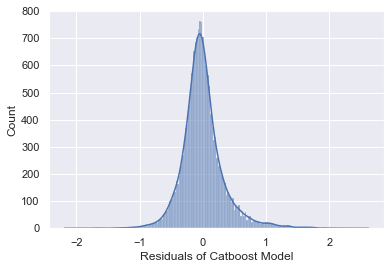

In [31]:
catboost_model = regressors[4]
y_pred_model_train = catboost_model.predict(X_train)
res_train = y_train-y_pred_model_train

sns.histplot(res_train,kde=True,alpha=0.6)
plt.xlabel('Residuals of Catboost Model')
plt.show()

In [32]:
import pickle

In [34]:
pickle.dump(regressors[4],open('cal_housing_model.pkl','wb'))

In [35]:
pickle.dump(scaler,open('cal_housing_preprocessing_scaler.pkl','wb')) 

In [36]:
model = pickle.load(open('cal_housing_model.pkl','rb'))

In [37]:
model.score(X_test, y_test)

0.8552341216371995